In [121]:
import pandas as pd
import os,sys
parentPath = os.path.join(os.path.dirname(os.getcwd()),"tools")
sys.path.insert(0, parentPath)
from scripts_py import preprocessing as pre

In [144]:
from scipy.optimize import curve_fit
from nltk.stem.snowball import DanishStemmer

#### open the sentiment dictionary

In [122]:
AFINN_dict = pd.read_csv('AFINN-da-32.txt', delimiter="\t").set_index('word').to_dict()['sentiment']

#### Functions for preprocessing

In [150]:
def stemmer(wordList):
    """stemming the words for later processing"""
    stemmer = DanishStemmer()
    return [stemmer.stem(tempWord) for tempWord in wordList]

In [123]:
def slice_tokens(tokens, n = 10, cut_off = True):
    """
    slice tokenized text in slices of n tokens
    - end cut off for full length normalization
    """
    slices = []
    for i in range(0,len(tokens),n):
        slices.append(tokens[i:(i+n)])
    if cut_off:
        del slices[-1]
    return slices

In [124]:
def analyze(contentOfArticle):
    '''return list of sentiment score'''
    sentimentScore = []
    for temp in contentOfArticle:
        sentimentScore.append(sum([AFINN_dict.get(token,0.0) for token in temp]))
    return sentimentScore

In [125]:
def func(x, a, b, c,d,e):
    """smooth help function"""
    return a*x + b*x*x + c*x*x*x +d*x*x*x*x +e

In [126]:
def smoother(dump):
    myInd = np.arange(len(dump))
    popt, pcov = curve_fit(func, myInd, dump)
    return [func(i,*popt) for i in myInd]

#### Set the source article

In [127]:
article = os.path.join(os.path.dirname(os.getcwd()),"ADL","plain","aare01val_workid69870.txt")

with open(article, encoding ="utf-8") as f:
    lines = f.readlines()
content = ' '.join(lines)

#### Preprocessing

In [153]:
nalpha_content = pre.re_nalpha(content)
tokenized_content = pre.tokenizer(nalpha_content)
stemmed_content = stemmer(tokenized_content)
sliced_content = slice_tokens(tokenized_content)

#### Sentiment analysis

In [154]:
score = analyze(sliced_content)
print(score)

[3.0, 0.0, 0.0, -3.0, 2.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, -1.0, 0.0, 0.0, -1.0, 0.0, 2.0, 1.0, 0.0, 0.0, -4.0, 0.0, 0.0, -2.0, -4.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0]


In [155]:
smoothedScore = smoother(score)

#### plot the sentiment score for the article

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
import numpy as np
x = np.arange(len(smoothedScore))

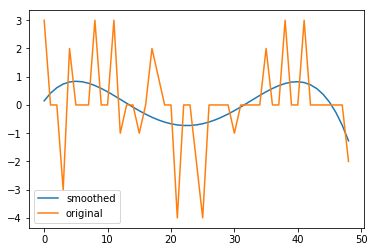

In [160]:
plt.plot(x, smoothedScore,score)
plt.legend( ('smoothed', 'original'))
print()